# Project 1
## Law of Large Numbers

---

inż. Wojciech Strycharczyk, inż. Sebastian Janus

---

trash and placeholder

Law of Large Numbers (implementing, procedure to check visually existance of the moments and illustration of this procedure on different distributions)

Trzeba zrobić

rozklady
1. rozkład wykładniczy,
1. rozkład gamma,
1. rozkład logarytmicznie normalny,
1. rozkład χ²,
1. rozkład Pareta,


Do każdego krótki opisik, i czy dziala (?)

In [74]:
import numpy as np
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm, expon
import statsmodels.api as sm
from scipy.stats import kstest

In [114]:
def llnDistr(size, distr, m=1, varianceCorrection=False, theoreticalMeanForCorrection=None, **kwargs):
    np.random.seed(44)
    
    if distr == "exponential":
        rvs = np.random.exponential(size = size, **kwargs)
    elif distr == "gamma":
        rvs = np.random.gamma(size = size, **kwargs)
    elif distr == "lognorm":
        rvs = np.random.lognormal(size = size, **kwargs)
    elif distr == "chisq":
        rvs = np.random.chisquare(size = size, **kwargs)
    elif distr == "pareto":
        rvs = kwargs['lmbda'] / np.power(1 - np.random.uniform(0, 1, size = size), 1/kwargs['alpha']) - kwargs['lmbda']
    elif distr == "weibull":
        rvs = np.random.weibull(size = size, **kwargs)
    else:
        return "Function available only for distributions: exponential, gamma, lognorm, chisq, pareto, weibull."
    
    if varianceCorrection:
        return np.arange(1, size + 1), np.cumsum((rvs - theoreticalMeanForCorrection)**m) / np.arange(1, size + 1)
    else:
        return np.arange(1, size + 1), np.cumsum(rvs**m) / np.arange(1, size + 1)

## Law of large numbers

Law of large numbers (LLN) is a theorem that says the average of the results obtained from a large number of trials should be close to the expected value as more trials are performed. 

We can use the LLN to verify if the moments exist for the given probability distribution visually. Let $X_1, X_2, \ldots, X_n$ be the i.i.d. random variables from the given probability distribution. Then, if they are well-defined, the following series

$$X_1, \frac{X_1 + X_2}{2}, \frac{X_1 + X_2 + X_3}{3}, \ldots, \frac{X_1 + \ldots + X_n}{n}$$

should converge to a constant.

In case of the first moment, we expect this series to converge to the theoretical expected value of the analysed probability distribution. When checking higher moments, we will just be looking at the convergence to the constant. 

## Exponential distribution

The exponential distribution is a probability distribution defined by the probability density function 

$$f_X(x) = \lambda e^{-\lambda x} \; \mathbf{1}_{x \geq 0}.$$

$\lambda$ is the rate parameter defined on $(0, \infty)$. We can define the following theoretical properties:
1. expected value: $\mathbb{E}X = \lambda^{-1}$,
1. variance⁠: $\text{Var}X = \lambda^{-2}.$



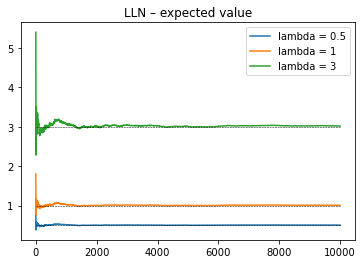

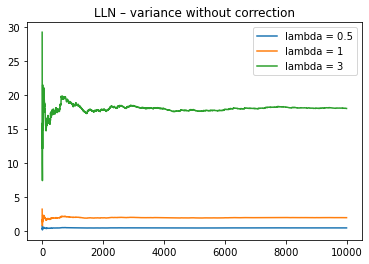

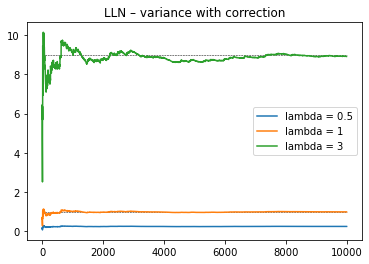

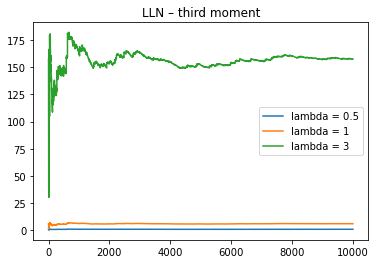

In [76]:
# Expected value
lambdas = [1/2, 1, 3]

for l in lambdas:
    x, y = llnDistr(10**4, 'exponential', m=1, scale=l)

    plt.plot(x, y, label = f"lambda = {l}")
    plt.hlines(l, xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – expected value")
plt.show()

# Variance (no correction)
for l in lambdas:
    x, y = llnDistr(10**4, 'exponential', m=2, scale=l)

    plt.plot(x, y, label = f"lambda = {l}")
    
plt.legend()
plt.title("LLN – variance without correction")
plt.show()

# Variance (correction)
for l in lambdas:
    x, y = llnDistr(10**4, 'exponential', m=2, varianceCorrection=True, theoreticalMeanForCorrection=l, scale=l)
    plt.hlines(l**2, xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)

    plt.plot(x, y, label = f"lambda = {l}")
    
plt.legend()
plt.title("LLN – variance with correction")
plt.show()

# Third moment
for l in lambdas:
    x, y = llnDistr(10**4, 'exponential', m=3, scale=l)

    plt.plot(x, y, label = f"lambda = {l}")
    
plt.legend()
plt.title("LLN – third moment")
plt.show()

We selected three lambdas, i.e. $0.5$, $1$ and $3$. We conducted the simulation for $N = 10^4$ to check the convergence of the above-mentioned series. In all of the cases, we observe that expected value, variance and third moment exist for the exponential distribution. Moreover, for the expected value and for the 'corrected' variance the series converge to the theoretical values, denoted by the dashed lines on the charts.

## Gamma distribution

The gamma distribution is a probability distribution defined by the probability density function

$$f(x) = \frac{\beta^{\alpha}}{\Gamma{\left(\alpha\right)}}x^{\alpha-1}e^{-\beta x}.$$

$\alpha$ is the shape parameter and $\beta$ is the rate parameter, both defined on $\left(0, \infty\right)$. We can define:

1. expected value: $\mathbb{E}X = \frac{\alpha}{\beta}$,
1. variance⁠: $\text{Var}X = \frac{\alpha}{\beta^2}.$ 

We can also define gamma distribution using the scale parameter:

$$f(x) = \frac{1}{\Gamma{\left(k\right)\theta^k}}x^{k-1}e^{-\frac{x}{\theta}},$$

where $k$ is the shape parameter and $\theta$ is the scale parameter, both defined on $\left(0, \infty\right)$. Then we define:

1. expected value: $\mathbb{E}X = k\theta$,
1. variance⁠: $\text{Var}X = k\theta^2.$ 

We will stick to the second formula where the scale parameter is defined.

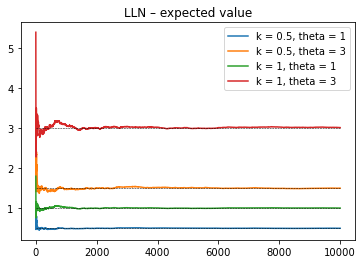

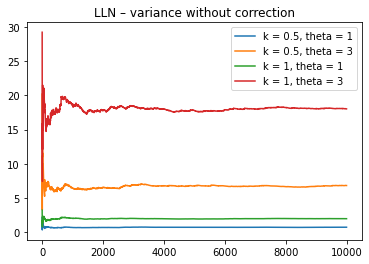

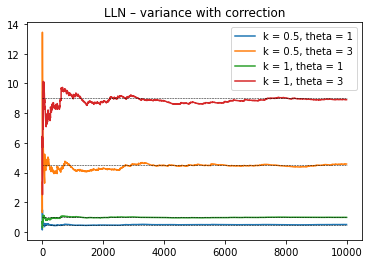

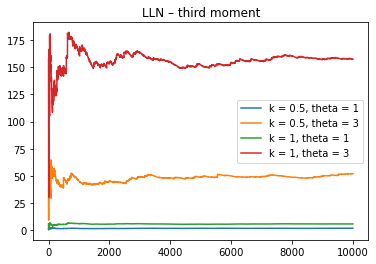

In [77]:
# Expected value
ks = [0.5, 1]
thetas = [1, 3]

for k in ks:
    for t in thetas:
        x, y = llnDistr(10**4, 'gamma', m=1, shape=k, scale=t)

        plt.plot(x, y, label = f"k = {k}, theta = {t}")
        plt.hlines(k*t, xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – expected value")
plt.show()

# Variance (no correction)
for k in ks:
    for t in thetas:
        x, y = llnDistr(10**4, 'gamma', m=2, shape=k, scale=t)

        plt.plot(x, y, label = f"k = {k}, theta = {t}")
    
plt.legend()
plt.title("LLN – variance without correction")
plt.show()

# Variance (correction)
for k in ks:
    for t in thetas:
        x, y = llnDistr(10**4, 'gamma', m=2, varianceCorrection=True, theoreticalMeanForCorrection=k*t, 
                        shape=k, scale=t)

        plt.plot(x, y, label = f"k = {k}, theta = {t}")
        plt.hlines(k*t**2, xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – variance with correction")
plt.show()

# Third moment
for k in ks:
    for t in thetas:
        x, y = llnDistr(10**4, 'gamma', m=3, shape=k, scale=t)

        plt.plot(x, y, label = f"k = {k}, theta = {t}")

plt.legend()
plt.title("LLN – third moment")
plt.show()

We cross-joined two sets of parameters, i.e. $k = \{0.5, \, 1\}$ and $\theta = \{1, \, 3\}$. We conducted the simulation for $N = 10^4$ to check the convergence of the above-mentioned series. In all of the cases, we observe that expected value, variance and third moment exist for the gamma distribution. Moreover, for the expected value and for the 'corrected' variance the series converge to the theoretical values, denoted by the dashed lines on the charts.

## Log-normal distribution

The log-normal distribution, that is the transformation of normal distribution, is defined by the probability density function

$$f(x) = \frac{1}{x\sigma\sqrt{2\pi}}\exp{\left(-\frac{\left(\log{x}-\mu\right)^2}{2\sigma^2}\right)}.$$

$\mu \in \mathbb{R}$ and $\sigma > 0$ are the expected value and standard deviation of the variable's natural logarithm. We can define:

1. expected value: $\mathbb{E}X = \exp{\left(\mu+\frac{\sigma^2}{2}\right)}$,
1. variance⁠: $\text{Var}X = \left[\exp{\left(\sigma^2\right)}-1\right]\exp{\left(2\mu+\sigma^2\right)}.$ 

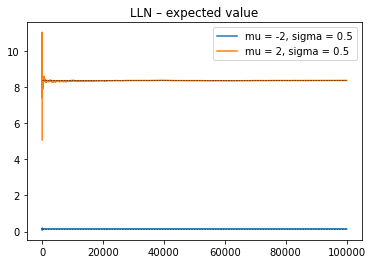

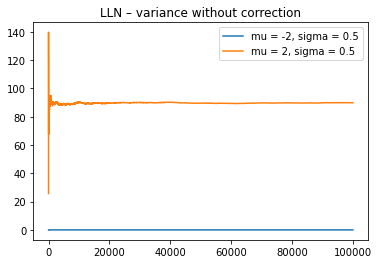

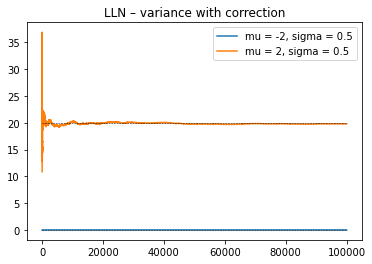

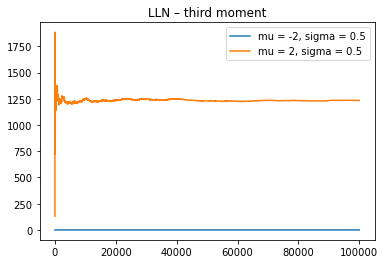

In [78]:
# Expected value
mus = [-2, 2]
sigmas = [0.5]

for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**4, 'lognorm', m=1, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
        plt.hlines(np.exp(m+s**2/2), xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – expected value")
plt.show()

# Variance (no correction)
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**4, 'lognorm', m=2, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
    
plt.legend()
plt.title("LLN – variance without correction")
plt.show()

# Variance (correction)
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**4, 'lognorm', m=2, varianceCorrection=True, theoreticalMeanForCorrection=np.exp(m+s**2/2),
                        mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
        plt.hlines((np.exp(s**2)-1)*np.exp(2*m+s**2), xmin=0, xmax=10**4, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – variance with correction")
plt.show()

# Third moment
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**4, 'lognorm', m=3, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")

plt.legend()
plt.title("LLN – third moment")
plt.show()

Firstly, we selected two values of $\mu$, i.e. $-2$ and $2$ and one $\sigma$ equaled $0.5$. We conducted the simulation for $N = 10^4$ to check the convergence of the above-mentioned series. In all of the cases, we observe that expected value, variance and third moment exist for the log-normal distribution. Moreover, for the expected value and for the 'corrected' variance the series converge to the theoretical values, denoted by the dashed lines on the charts.

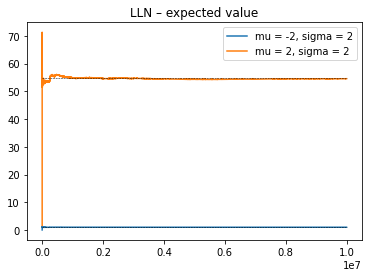

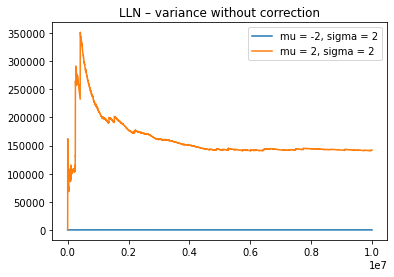

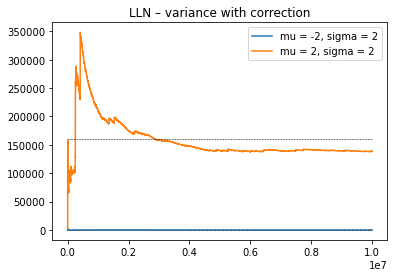

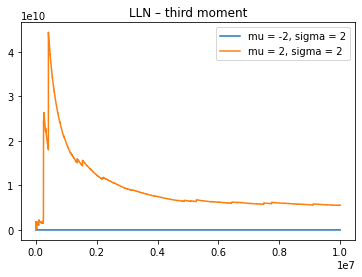

In [79]:
# Expected value
mus = [-2, 2]
sigmas = [2]

for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**7, 'lognorm', m=1, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
        plt.hlines(np.exp(m+s**2/2), xmin=0, xmax=10**7, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – expected value")
plt.show()

# Variance (no correction)
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**7, 'lognorm', m=2, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
    
plt.legend()
plt.title("LLN – variance without correction")
plt.show()

# Variance (correction)
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**7, 'lognorm', m=2, varianceCorrection=True, theoreticalMeanForCorrection=np.exp(m+s**2/2),
                        mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")
        plt.hlines((np.exp(s**2)-1)*np.exp(2*m+s**2), xmin=0, xmax=10**7, ls='dashed', color='0', linewidth=0.5)
    
plt.legend()
plt.title("LLN – variance with correction")
plt.show()

# Third moment
for m in mus:
    for s in sigmas:
        x, y = llnDistr(10**7, 'lognorm', m=3, mean=m, sigma=s)

        plt.plot(x, y, label = f"mu = {m}, sigma = {s}")

plt.legend()
plt.title("LLN – third moment")
plt.show()

Next, we selected the same values of $\mu$ and this time $\sigma$ equaled $2$. We noticed that the speed of convergence is very slow for higher values of $\sigma$ and that's why we have decided to increase $N$ to $10^7$. We observe that eventualy, the series converges to the constant, same as in the case of smaller $\sigma$.

## Pareto distribution

The Pareto distribution is a probability distribution defined by the probability density function

$$f(x) = \frac{\alpha m^{\alpha}}{x^{\alpha + 1}}\; \mathbf{1}_{x \geq m}.$$

$m > 0$ is the scale parameter and $\alpha > 0$ is the shape parameter. Also $x \in \left[m, \infty\right)$. We can define:

1. expected value: $\mathbb{E}X = \frac{\lambda}{\alpha - 1} \;\text{when} \;\alpha > 1$,
1. variance⁠: $\text{Var}X = \frac{\lambda^2\alpha}{\left(\alpha-1\right)^2\left(\alpha-2\right)} \;\text{when} \;\alpha > 2.$ 

Generally, $k$-th moment exists for $\alpha > k$.

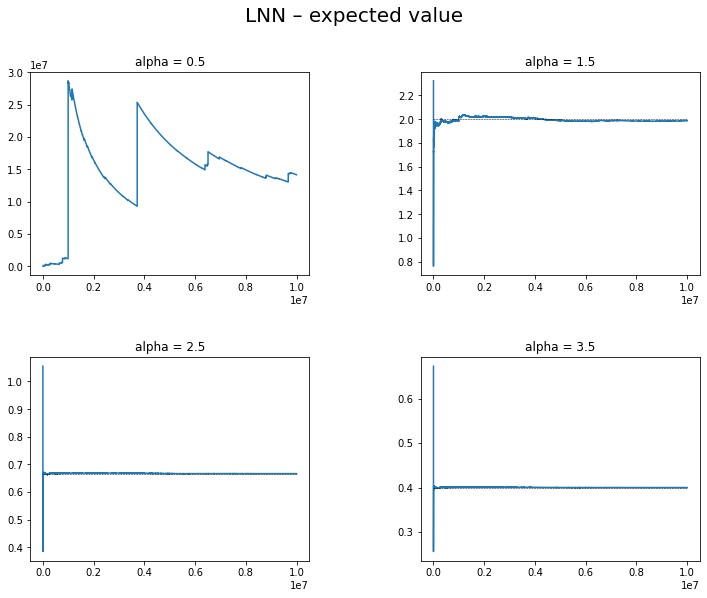

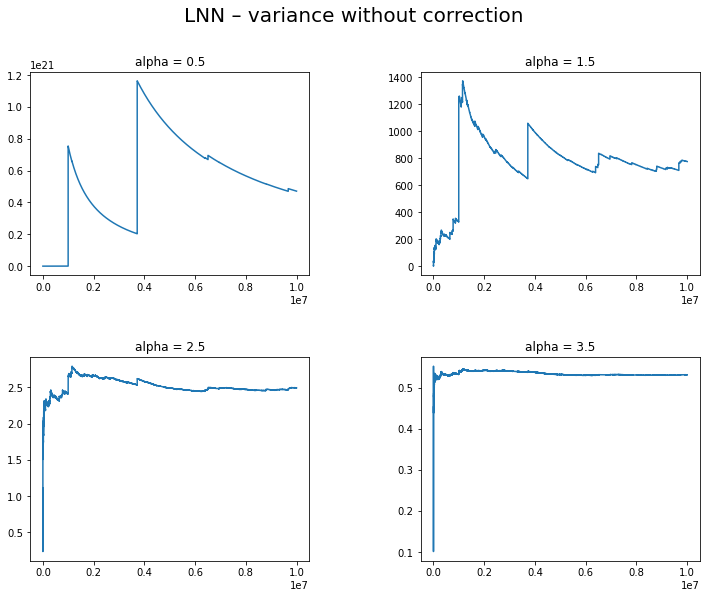

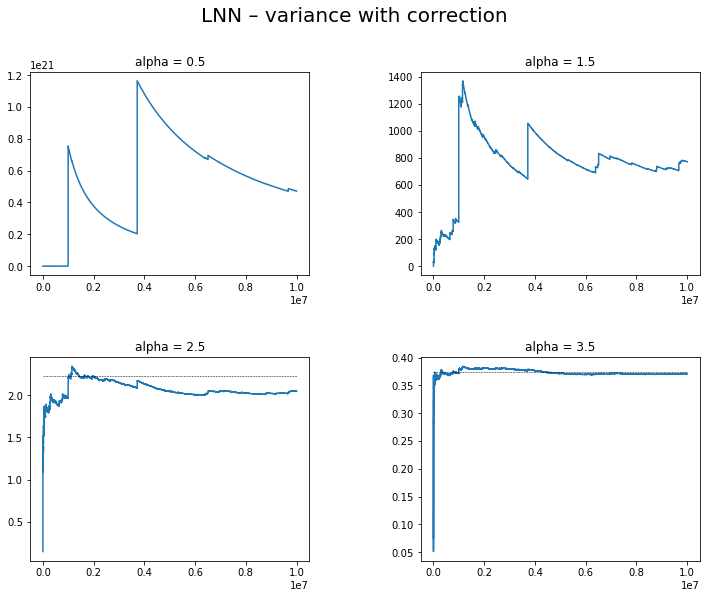

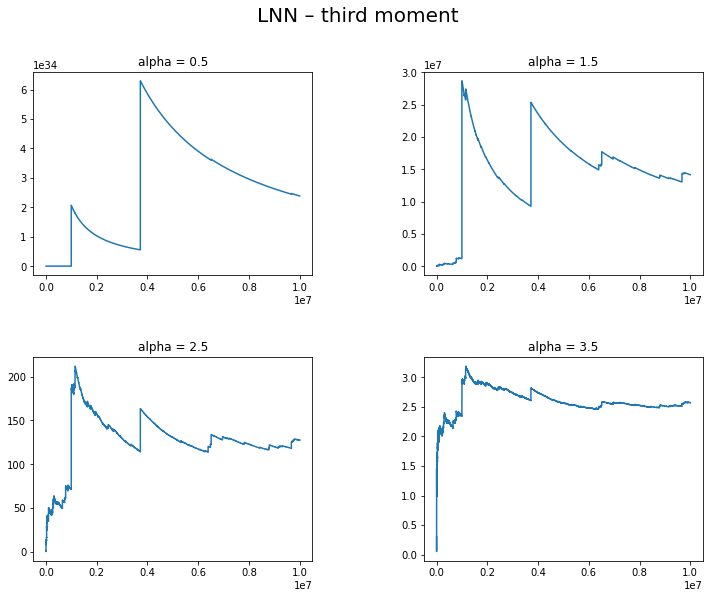

In [146]:
# Expected value
aas = [0.5, 1.5, 2.5, 3.5]
lmbdas = 1

fig = plt.figure(figsize=(12, 9))

for i in range(len(aas)):
    x, y = llnDistr(10**7, 'pareto', m=1, lmbda=lmbdas, alpha=aas[i])
    
    ax = plt.subplot(2, 2, i+1)
    plt.plot(x, y)
    if i >= 1:
        plt.hlines(lmbdas / (aas[i] - 1) , xmin=0, xmax=10**7, ls='dashed', color='0', linewidth=0.5)
    ax.set_title(f"alpha = {aas[i]}")
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle("LNN – expected value", fontsize=20)
plt.show()

# Variance (no correction)
fig = plt.figure(figsize=(12, 9))

for i in range(len(aas)):
    x, y = llnDistr(10**7, 'pareto', m=2, lmbda=lmbdas, alpha=aas[i])
    
    ax = plt.subplot(2, 2, i+1)
    plt.plot(x, y)
    ax.set_title(f"alpha = {aas[i]}")
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle("LNN – variance without correction", fontsize=20)
plt.show()

# Variance (correction)
fig = plt.figure(figsize=(12, 9))

for i in range(len(aas)):
    x, y = llnDistr(10**7, 'pareto', m=2, lmbda=lmbdas, varianceCorrection=True, 
                    theoreticalMeanForCorrection=lmbdas/(aas[i]-1), alpha=aas[i])
    
    ax = plt.subplot(2, 2, i+1)
    plt.plot(x, y)
    if i >= 2:
        plt.hlines((lmbdas**2 / (aas[i] - 1)**2) * (aas[i] / (aas[i] - 2)) , xmin=0, xmax=10**7, ls='dashed', color='0', linewidth=0.5)
    ax.set_title(f"alpha = {aas[i]}")
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle("LNN – variance with correction", fontsize=20)
plt.show()

# Third moment
fig = plt.figure(figsize=(12, 9))

for i in range(len(aas)):
    x, y = llnDistr(10**7, 'pareto', m=3, lmbda=lmbdas, alpha=aas[i])
    
    ax = plt.subplot(2, 2, i+1)
    plt.plot(x, y)
    ax.set_title(f"alpha = {aas[i]}")
    
fig.subplots_adjust(wspace=0.4, hspace=0.4)
fig.suptitle("LNN – third moment", fontsize=20)
plt.show()

DOPISAĆ WNIOSECZKI DO PARETO, KIEDY ISTNIEJE KIEDY NIE I DLACZEGO

PO TYM:

1. WYJEBAĆ PLACEHOLDER
1. SZYBCIUTKO PRZECZYTAĆ CZY WSZYSTKO SIĘ ZGADZA I CZY WSZYSTKO JEST NAPISANE
1. PRZENIEŚĆ DO LATEX PDF BEZ KODÓW